In [94]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 6.6 MB/s eta 0:00:00a 0:00:01


In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA, NMF
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import time
from prince import MCA

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# Introduction

This notebook is an approach to the kaggle competition https://www.kaggle.com/competitions/playground-series-s4e2/overview

The goal of this notebook is exploring how unsupervised learning method help us understand data and enhence supervised learning models.

## Problem

Obesity is one of the leading preventable causes of death worldwide. The traditional way to classify obesity is solely relying on height and weight by calculating BMI = weight / square(height). This project aims to build a machine learning model using comprehensive information to predict one's obesity risk like normal weight, over weight and obesity type I/II/III. 

## Data

The dataset this notebook used is from kaggle competition and generated from a deep learning model trained on the Obesity or CVD risk dataset. It contains various personal, lifestyle, and health-related features aimed at predicting obesity risk levels. The train dataset has shape (20758, 18). The dataset includes both categorical and numerical variables. 18 features in the dataset are:

* ID: Unique identifier for each individual.
* Gender: Categorical feature indicating gender (Male/Female).
* Age: Age of the individual.
* Height: Height in meters.
* Weight: Weight in kilograms.
* Family History with Overweight: Categorical feature indicating whether the individual has a family history of being overweight (yes/no).
* FAVC: Indicates if the individual frequently consumes high-calorie food (yes/no).
* FCVC: Frequency of vegetable consumption.
* NCP: Number of main meals consumed per day.
* CAEC: Frequency of eating between meals (Sometimes, Frequently, Always).
* SMOKE: Smoking habit (yes/no).
* CH2O: Daily water consumption in liters.
* SCC: Monitors calorie consumption (yes/no).
* FAF: Frequency of physical activity per week.
* TUE: Time spent on technology (hours/day).
* CALC: Frequency of alcohol consumption (Sometimes, Frequently, Always).
* MTRANS: Mode of transportation (Automobile, Public Transport, Walking, etc.).
* NObeyesdad: Target variable indicating the obesity risk level (e.g., Normal Weight, Overweight, Obesity Type I/II/III).

The target column "NObeyesdad" contains 7 classes: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III.

# Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data 



## Load Data

In [2]:
in_dir = "/kaggle/input/playground-series-s4e2"
train_df = pd.read_csv(in_dir + "/train.csv")
test_df = pd.read_csv(in_dir + "/test.csv")
print(f'The shape of train dataset is {train_df.shape}')
print(f'The shape of test dataset is {test_df.shape}')

The shape of train dataset is (20758, 18)
The shape of test dataset is (13840, 17)


## Inspect Data

In [66]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [3]:
train_df.describe(include='all')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


## Clean Data

### Drop Irrelevant Columns

Drop id first, since our model can't learn anything from id.

In [3]:
train_df.drop('id', axis=1, inplace=True)
print(train_df.shape)

(20758, 17)


### check missing value

In [4]:
train_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There is no missing value.

### check duplicates

In [10]:
train_df.duplicated().sum()

0

There is no duplicates.

In [4]:
numerical_features = train_df.select_dtypes(exclude="object").columns
categorical_features = train_df.select_dtypes(include="object").columns
categorical_features = [feature for feature in categorical_features if feature != 'NObeyesdad']

In [36]:
print(f'Numerical Features: {numerical_features}')
print(f'Categorical Features: {categorical_features}')

Numerical Features: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


### Check Outlier

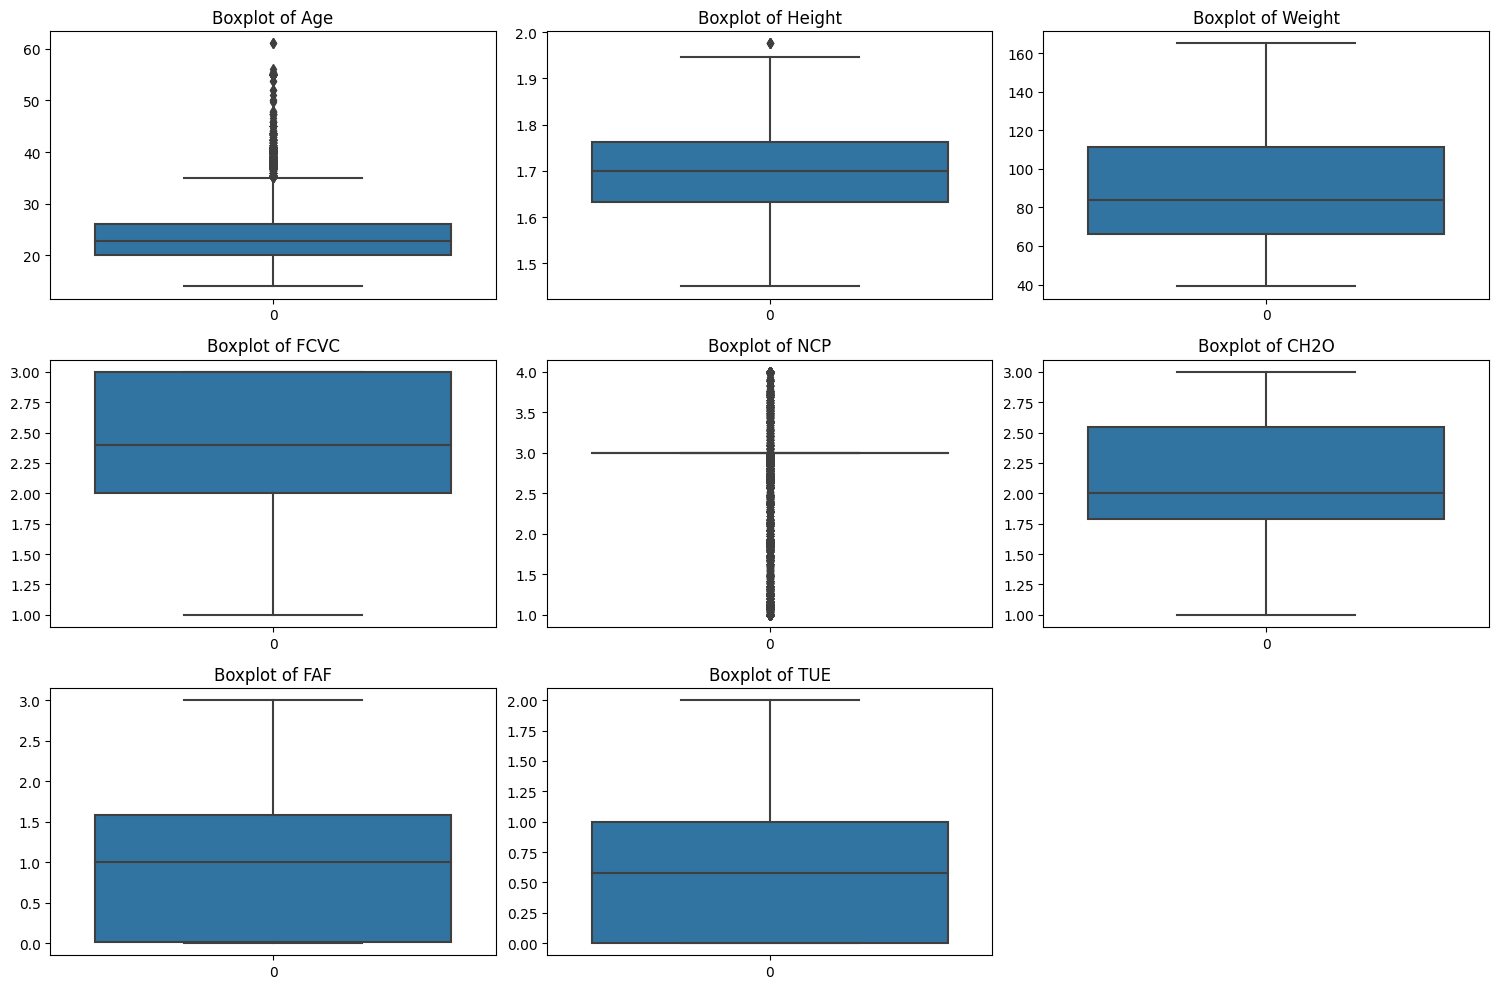

In [16]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(train_df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()  
plt.show()

Keep the outliers as they are meaningful. Like feature "NCP" indicates the meals consumed per day. The Majority data points consume 3 meals a day, but that doesn't make other number of meals outliers as they are also informative for perdicting obesity.

### Summary:

* Drop irrelevated columns
* Check missing value and handle missing value
* Check duplicates and handle duplicates
* Check outliers and handle outliers

## Explore Data 

### Distribution of Target

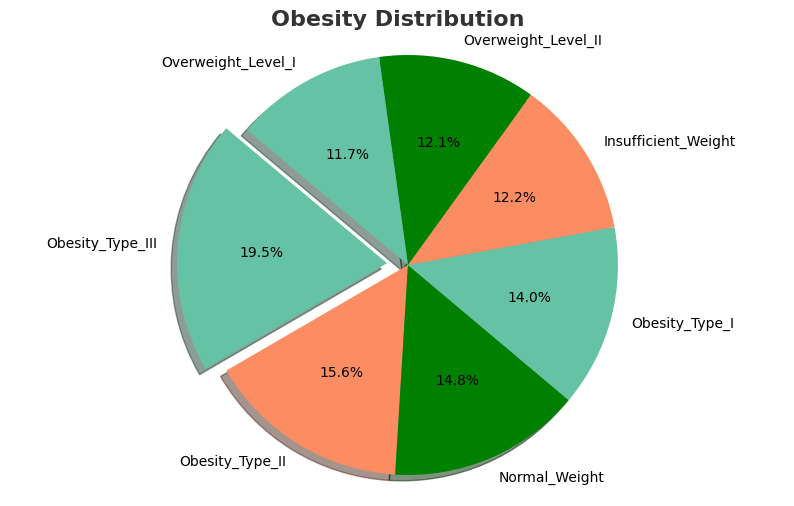

In [32]:
tar_counts = train_df['NObeyesdad'].value_counts()

colors = ['#66c2a5', '#fc8d62', 'green']

explode = [0.1] + [0] * (len(tar_counts) - 1)

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(tar_counts, labels=tar_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=colors, explode=explode, shadow=True)
plt.title('Obesity Distribution', fontsize=16, fontweight='bold', color='#333333')
plt.axis('equal')  
plt.show()

All 7 classes are almost perfectly balanced.

### Distribution of Numerical Features

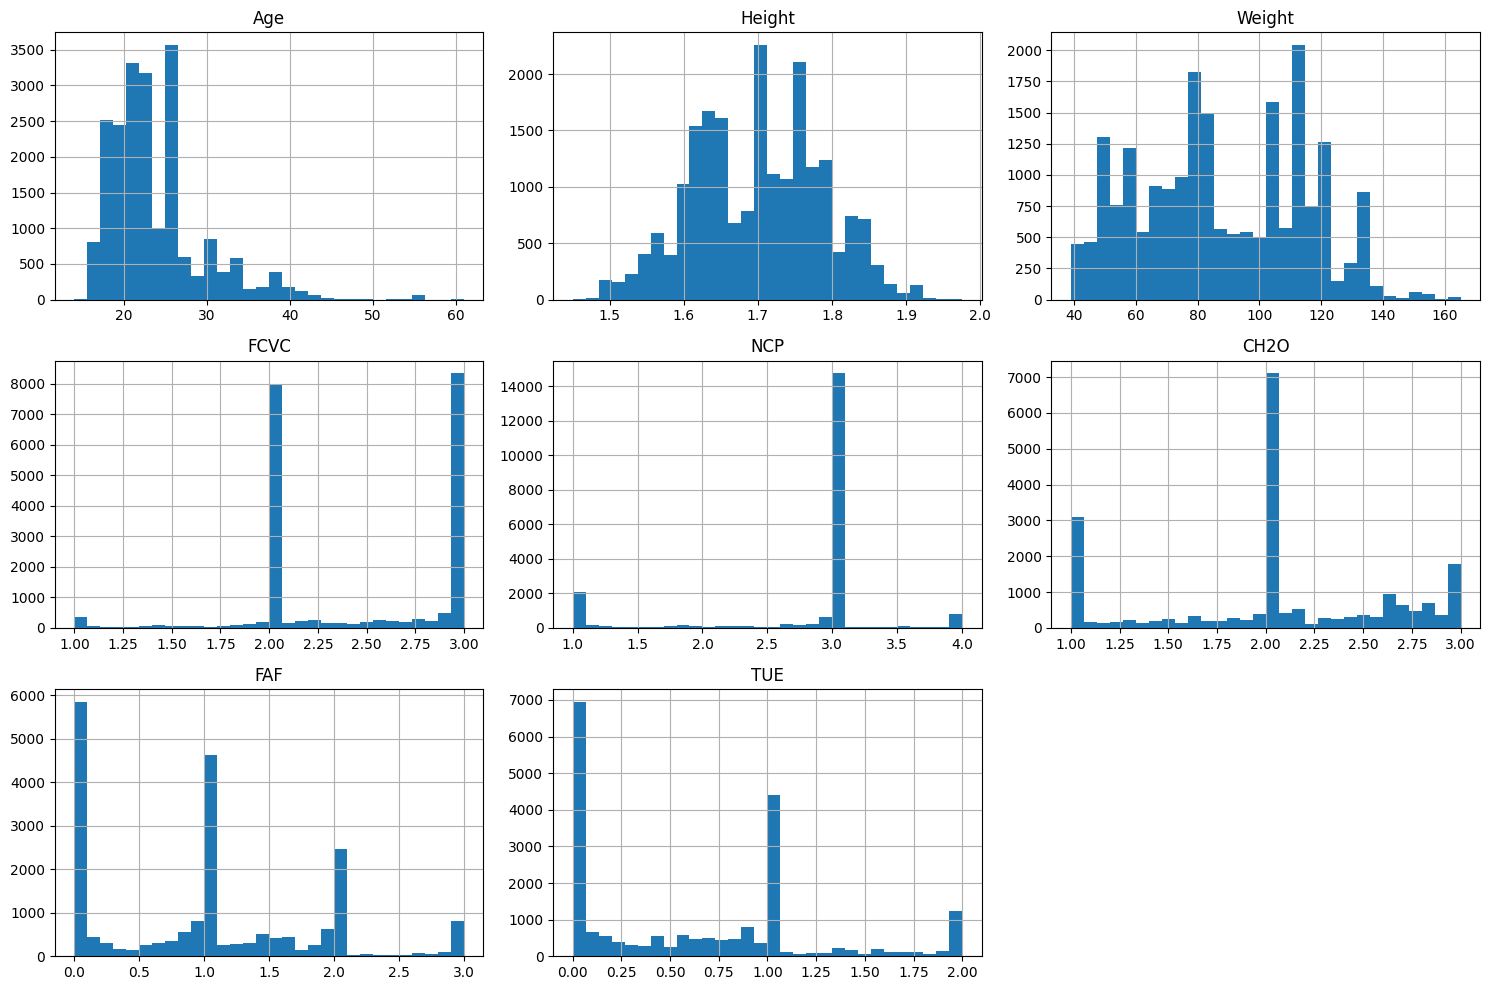

In [33]:
train_df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Only age, height, weight are continuous data, the rest numerical features are discrete.

### Distribution of Categorical Features

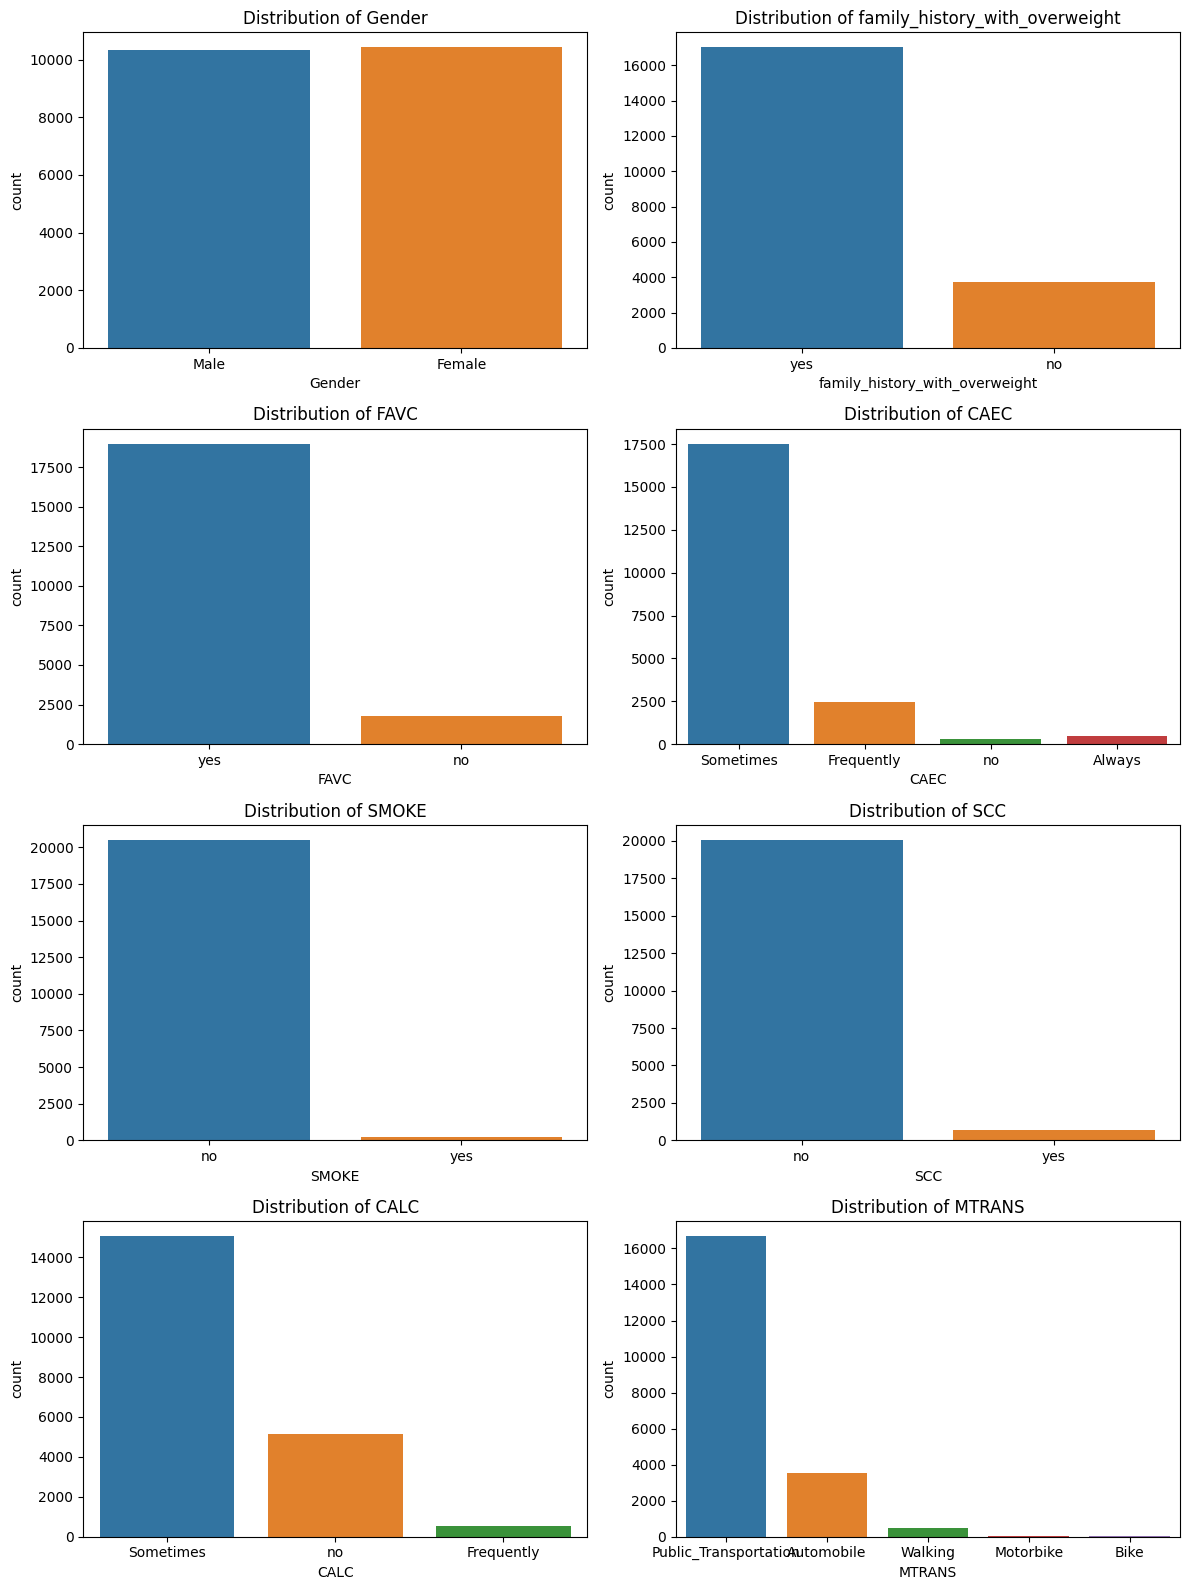

In [43]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  
axes = axes.flatten() 

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=train_df, ax=axes[i]) 
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

Categorical features are highly imbalanced except gender.

### Relationship Between Categorical Features and Obesity Risk

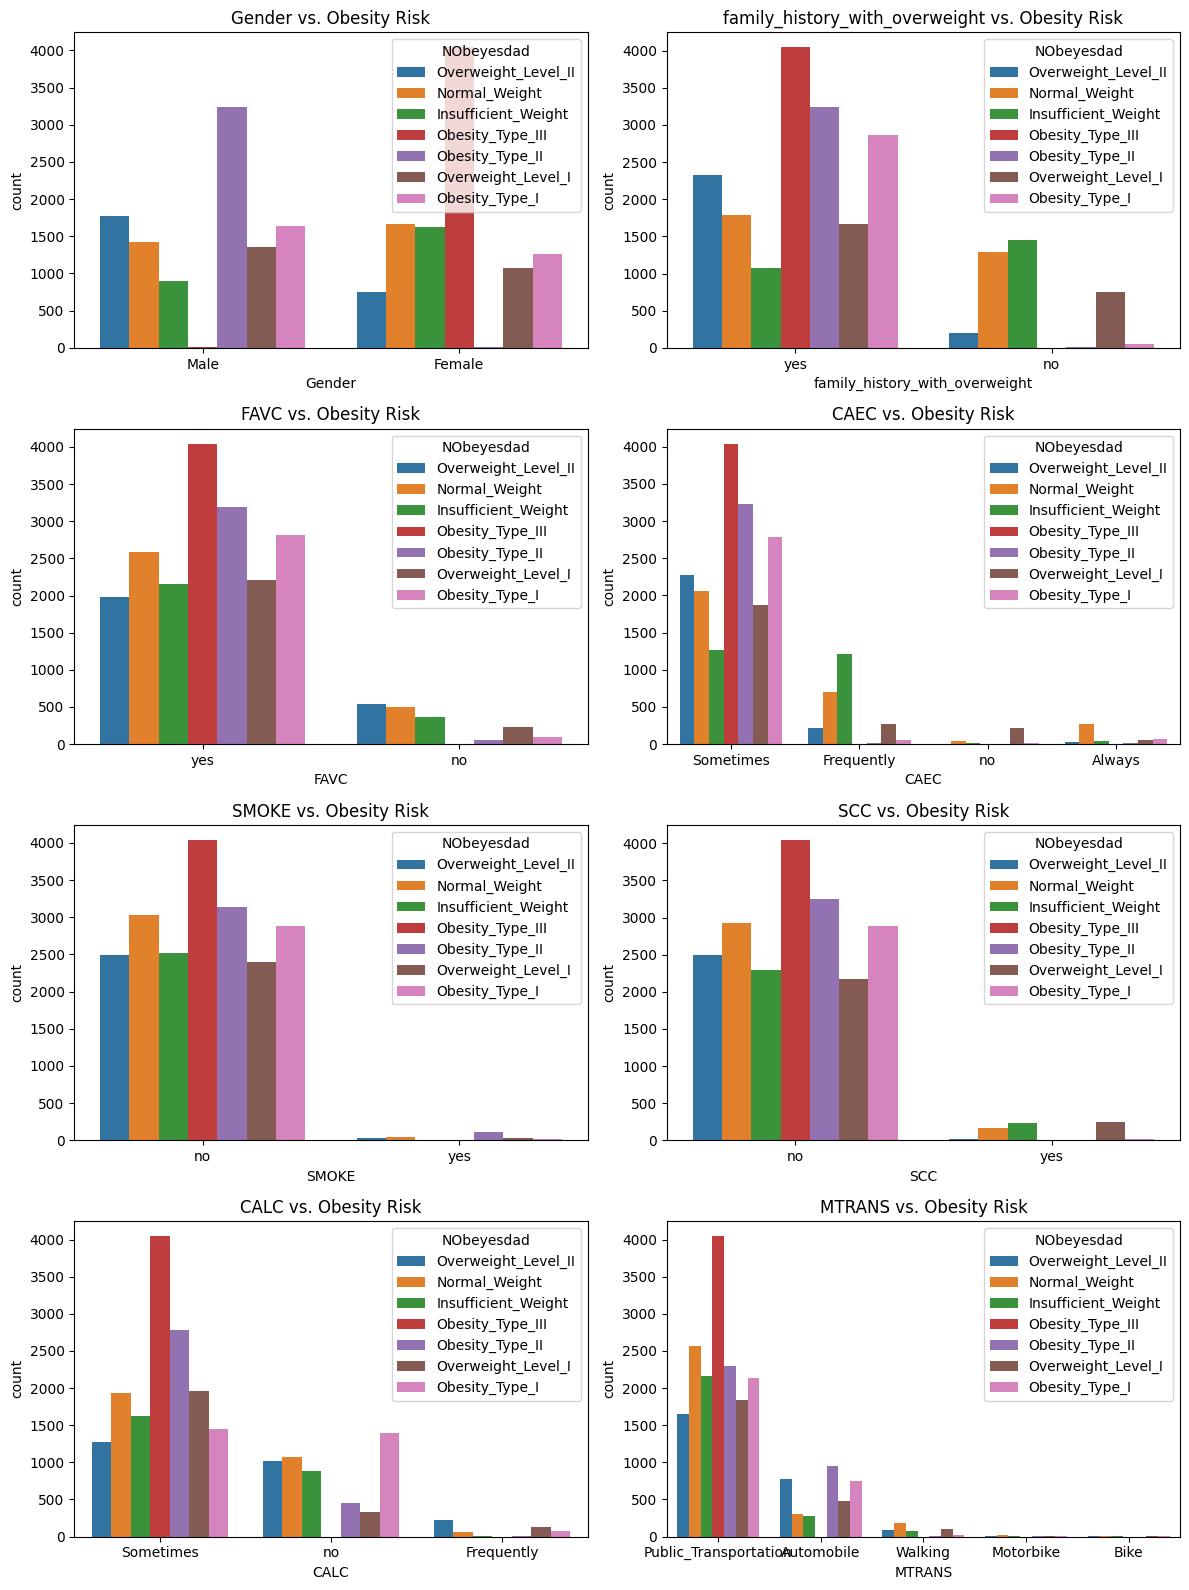

In [44]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  
axes = axes.flatten() 

for i, col in enumerate(categorical_features):
    sns.countplot(x=col,hue='NObeyesdad', data=train_df, ax=axes[i]) 
    axes[i].set_title(f"{col} vs. Obesity Risk")

plt.tight_layout()
plt.show()


As the category features are imbalanced, the count can't tell us too much information. Let's try display percentages.

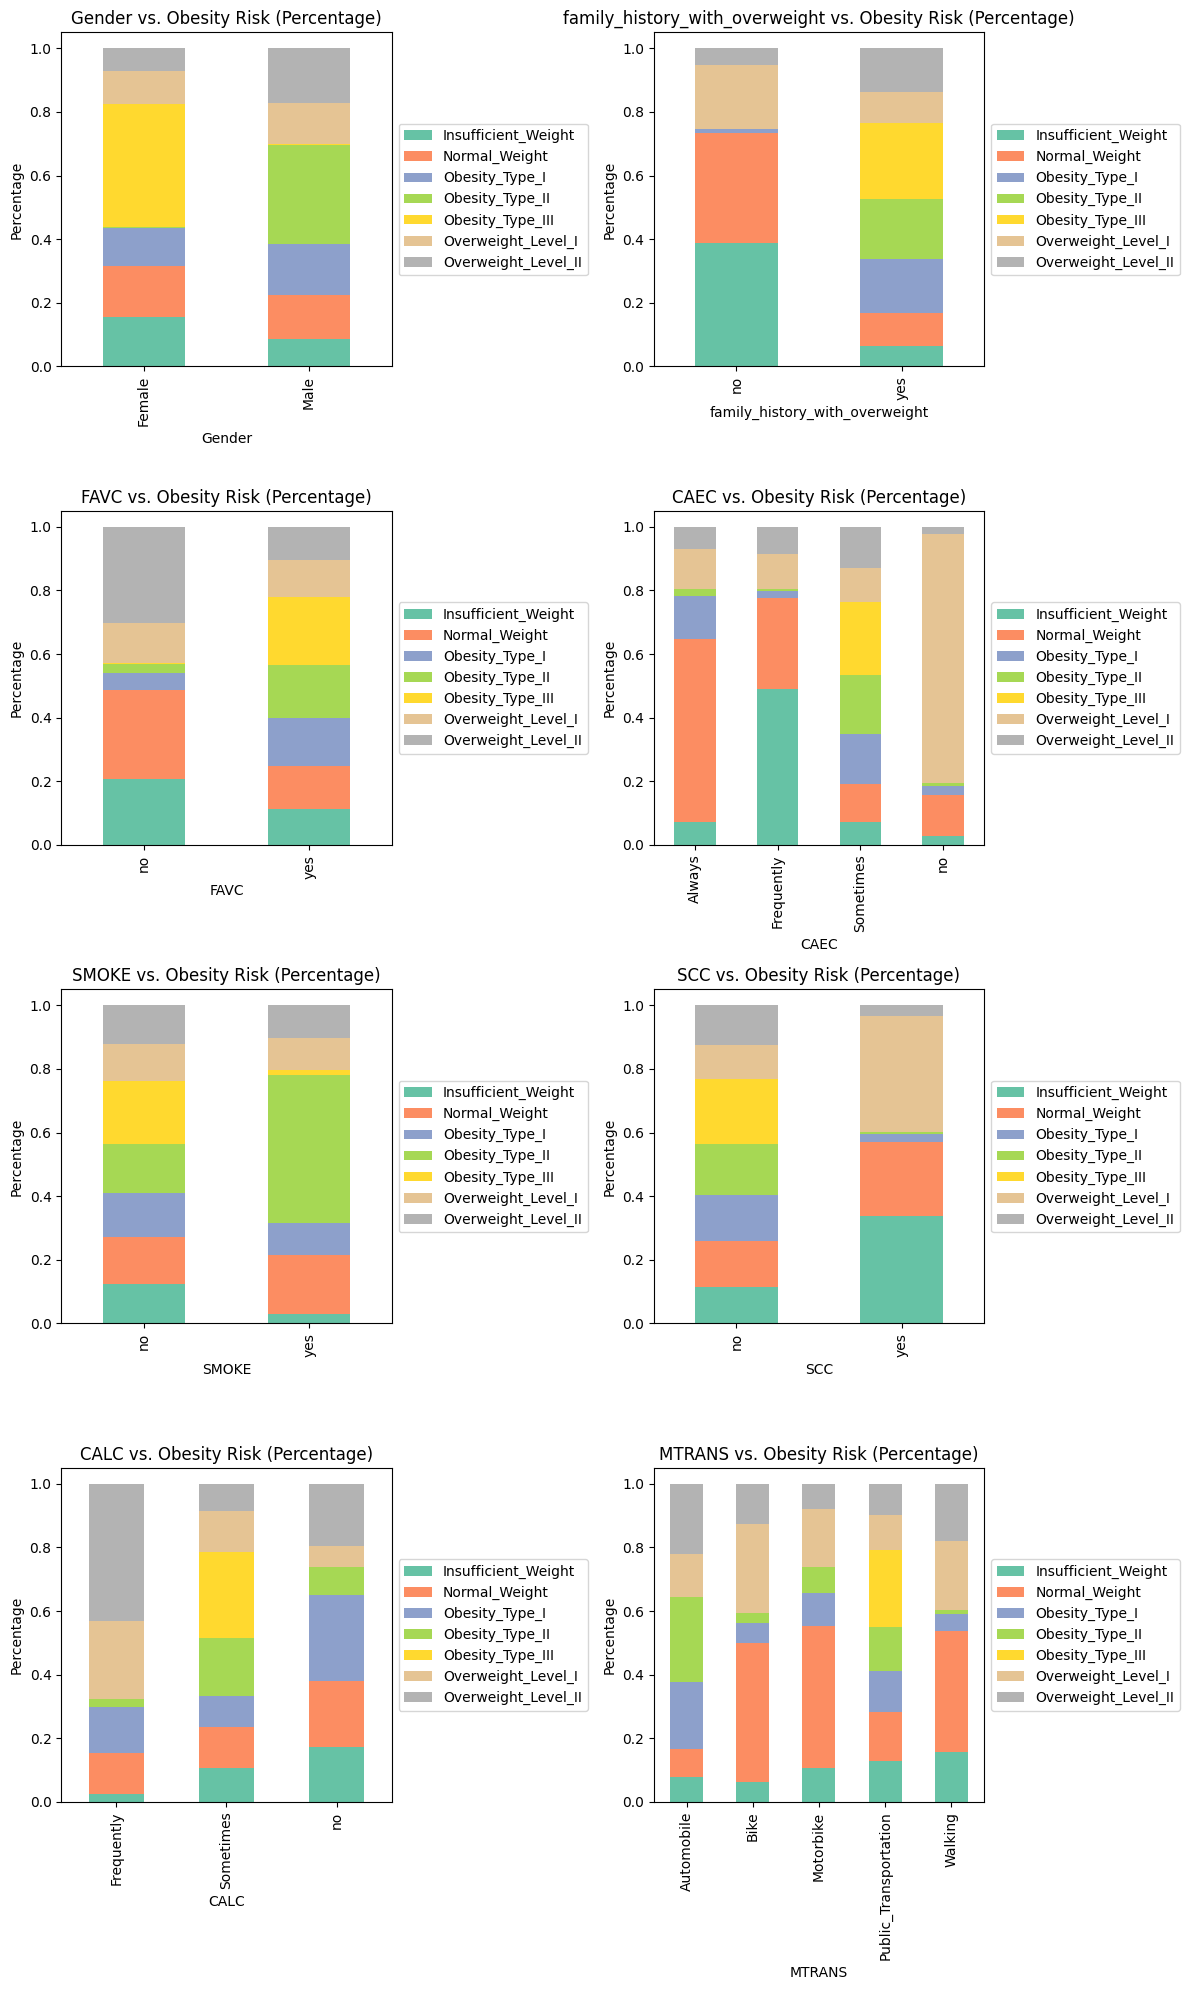

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))  
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    # Calculate percentage for each group
    group_data = train_df.groupby([col, 'NObeyesdad']).size().unstack(fill_value=0)  
    group_percentage = group_data.div(group_data.sum(axis=1), axis=0) 

    # Plot the percentage as a stacked bar plot
    group_percentage.plot(kind='bar', stacked=True, ax=axes[i], cmap='Set2')
    axes[i].set_title(f"{col} vs. Obesity Risk (Percentage)")
    axes[i].set_ylabel('Percentage')
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

* Male tends to be obesity type III, whereas female tends to be obesity type II.
* In the group of don't have family history, the majority of people are insufficient or normal weight.
* Suprisingly, people who always eat between meals are tend to be normal weight and people who never eat between meals are tend to be overweight level I.
* Insufficient weight people and over weight level I people are more likely monitoring their calorie consumption.
* People who frequently drink alcohol tend to be over weight level II.

### Relationship Between Numerical Features and Obesity Risk

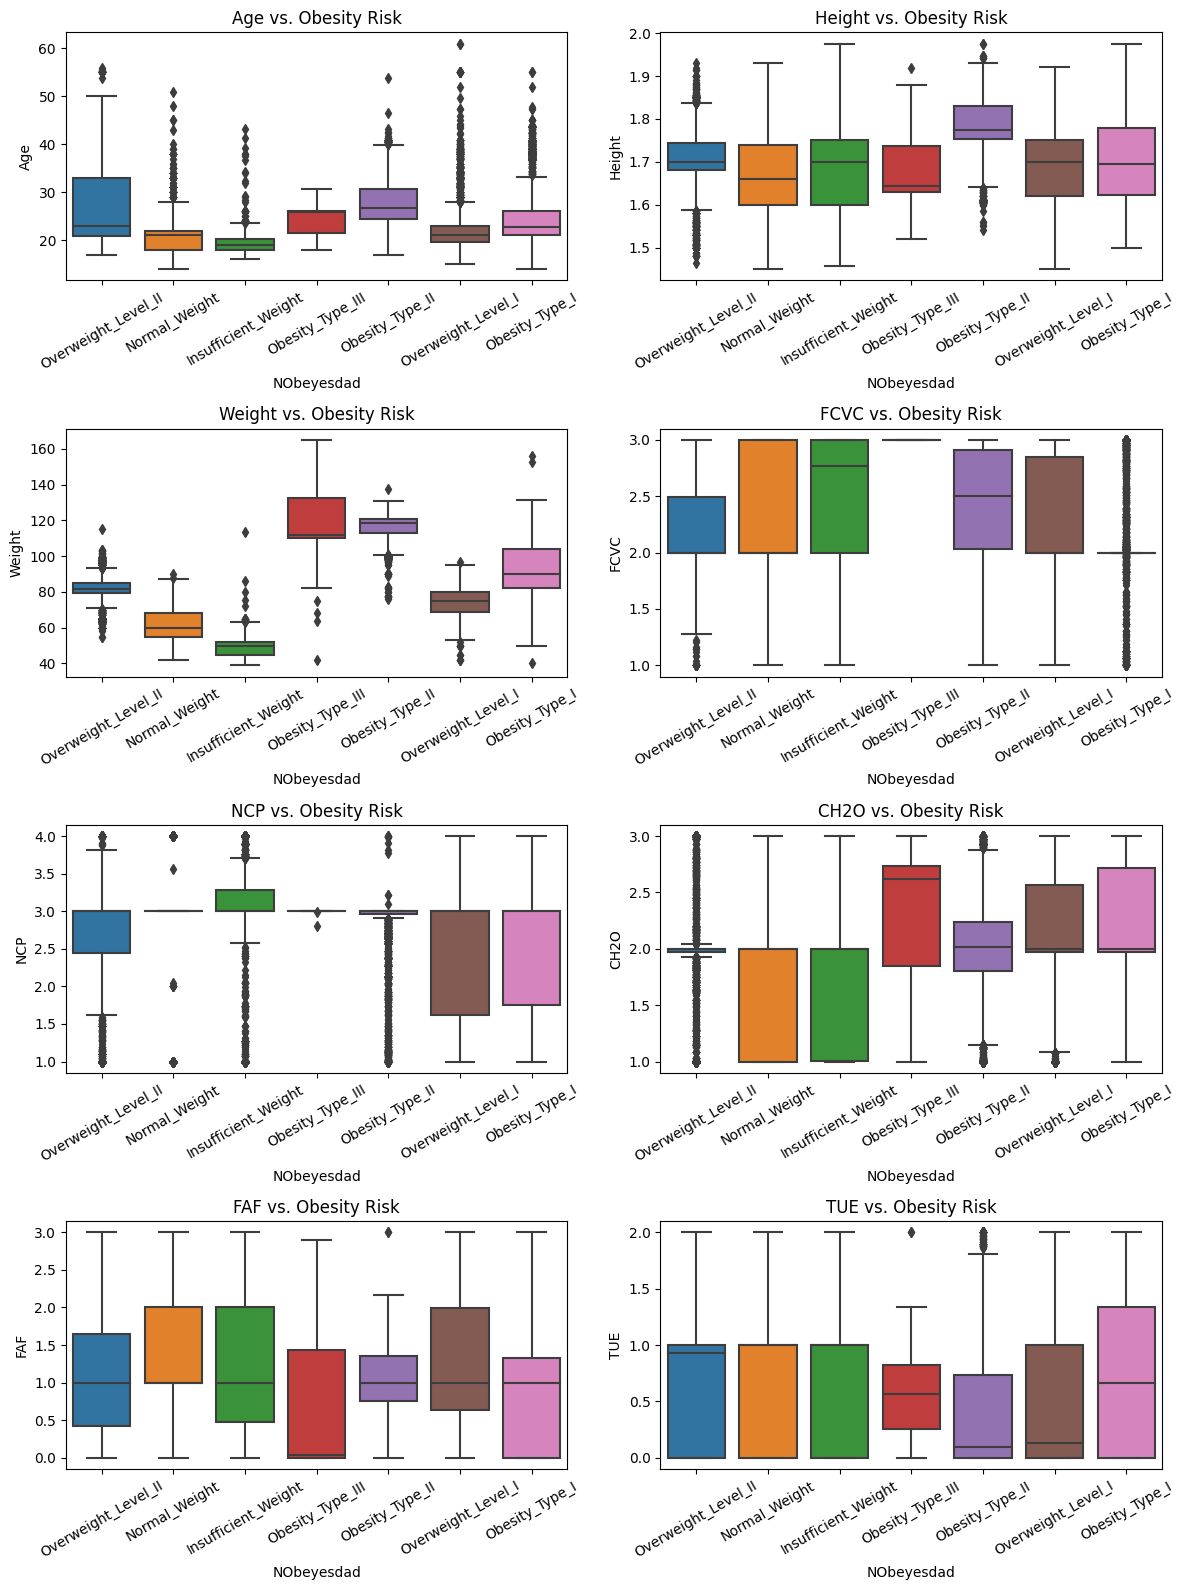

In [51]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  
axes = axes.flatten() 
for i, col in enumerate(numerical_features):
    sns.boxplot(x='NObeyesdad', y=col, data=train_df, ax=axes[i]) 
    axes[i].set_title(f"{col} vs. Obesity Risk")
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()


Weight is linear to the extents of obesity.

### Draw Correlation Matrix

In [19]:
print(train_df['NObeyesdad'].unique())
target_labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
label_to_idx = dict()
for i, label in enumerate(target_labels):
    label_to_idx[label] = i
train_df['NObeyesdad'] = train_df['NObeyesdad'].map(lambda x: label_to_idx[x])
print(train_df['NObeyesdad'].unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']
[3 1 0 6 5 2 4]


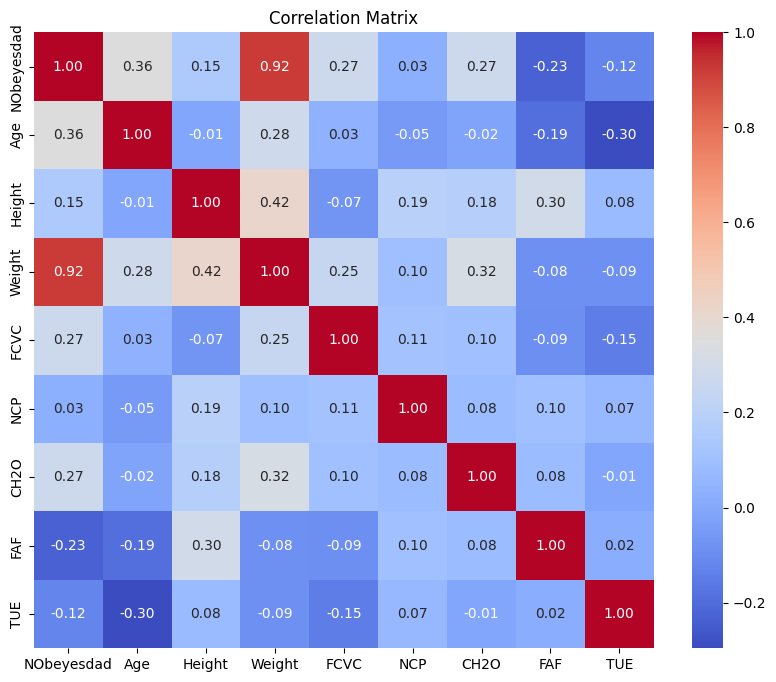

In [35]:
# add numerical features and target column together
tmp_columns = ['NObeyesdad']
tmp_columns.extend(numerical_features)
corr_matrix = train_df[tmp_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Summary

* Checked distribution of all columns and relationship between features and target column.
* The distribution of "NObeyesdad" is very balanced.
* The distribution of most features are imbalanced, except height, weight, and gender.
* Male tends to be obesity type III, whereas female tends to be obesity type II.
* In the group of don't have family history, the majority of people are insufficient or normal weight.
* Suprisingly, people who always eat between meals are tend to be normal weight and people who never eat between meals are tend to be overweight level I.
* Insufficient weight people and over weight level I people are more likely monitoring their calorie consumption.
* People who frequently drink alcohol tend to be over weight level II.
* Obesity risk level are highly related to weight

# Unsupervised Analysis

## Prepare Data

### Transform Categorical Features


In [69]:
train_df[categorical_features].head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Frequently,no,no,no,Automobile
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [12]:
train_df = pd.get_dummies(train_df, columns=categorical_features)

In [13]:
print(train_df.shape)
train_df.head()

(20758, 31)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,True,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,True,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False


In [56]:
X = train_df.drop('NObeyesdad', axis=1) 
y = train_df['NObeyesdad']


## K-Means Clustering

Considering our dataset contains many categorical features, K-Means clustering might not work well since Euclidean distance in categorical dimension space does not make sense. we will still try K-Means clustering to discover the similarity of data points.

### Scale Numerical Features

In [38]:
scaler = StandardScaler()
# X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_scaled = scaler.fit_transform(X)
X.shape

(20758, 30)

In [57]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

X['Cluster'] = clusters
print(X['Cluster'].value_counts()) 

Cluster
3    5640
5    4736
2    2516
0    2320
6    2077
4    1988
1    1481
Name: count, dtype: int64


In [40]:
def visualize_clusters(clusters, data):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)

    pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = clusters

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=100)
    plt.title('Clusters Visualized in 2D (PCA)')
    plt.show()

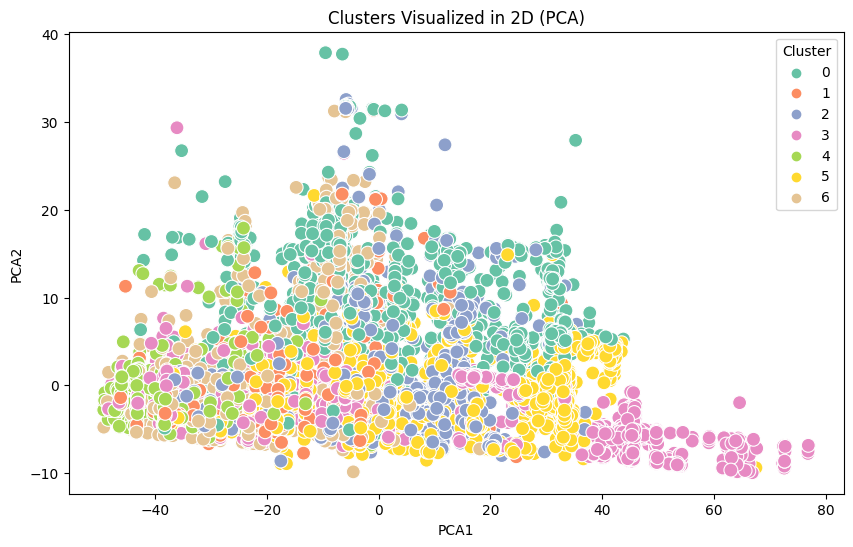

In [58]:
visualize_clusters(clusters, X)

Display in 3D

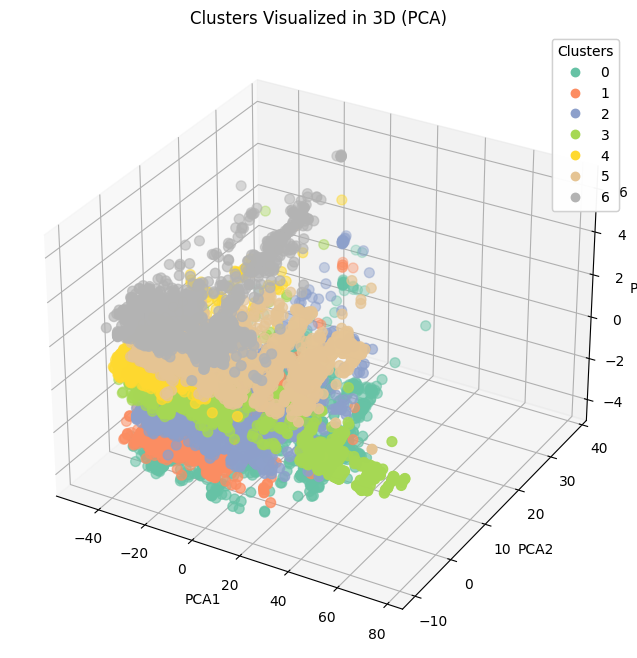

In [59]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['Cluster'], cmap='Set2', s=50)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('Clusters Visualized in 3D (PCA)')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

We use accuracy rate to evaluate if the clusters reflect the obesity risk level of the data points.

In [62]:
from itertools import permutations
def evaluate_cluster(clusters, y, n=7):
    cluster_to_tar = dict()
    perms = np.array(list(permutations(range(n))))
    best_cluster_score = 0
    for permutation in perms:
        cur_map = dict(zip(permutation, range(n)))
        cur_prediction = np.array([cur_map[cluster] for cluster in clusters])
        cur_score = accuracy_score(y, cur_prediction)
        if cur_score > best_cluster_score:
            best_cluster_score = cur_score
            cluster_to_tar = cur_map
    print(cluster_to_tar)
    print(best_cluster_score)
    return {"score": best_cluster_score, "cluster_to_tar": cluster_to_tar}

In [63]:
evaluate_cluster(clusters, y)

{4: 0, 6: 1, 1: 2, 0: 3, 2: 4, 5: 5, 3: 6}
0.4474901242894306


{'score': 0.4474901242894306,
 'cluster_to_tar': {4: 0, 6: 1, 1: 2, 0: 3, 2: 4, 5: 5, 3: 6}}

The clusters are not perfectly align with classfication target.

## NMF

We also consider using Non-Negative Matrix Factorization. NMF is a very popular way to discovery latent features and reduce dimensionality. Our dataset indeed does not contain negative values. But with 8 categorical features, NMF may be struggle with geting a meaningful result. We can try it.

In [64]:
X = train_df.drop('NObeyesdad', axis=1) 
y = train_df['NObeyesdad']

In [65]:
# Since we can not have negative values, we use minmax scaler instead of standard scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
print(X.shape)
print(y.shape)

(20758, 30)
(20758,)


In [67]:
nmf = NMF(n_components=7, random_state=42)
W = nmf.fit_transform(X_scaled) 
H = nmf.components_ 

In [68]:
print(W.shape)
print(H.shape)

(20758, 7)
(7, 30)


In [69]:
component_df = pd.DataFrame(H, columns=X.columns)
print(component_df)
# print(W)  

        Age    Height    Weight       FCVC       NCP      CH2O       FAF  \
0  1.443489  5.011369  6.441295   0.612338  3.220390  0.000000  0.000000   
1  0.197781  4.292924  0.000000  10.660139  9.680425  5.923487  5.855220   
2  0.823472  1.252761  0.000000   0.000000  0.000000  0.000000  2.321903   
3  1.720529  4.716263  1.950343   0.000000  0.519285  0.390055  3.149913   
4  1.471868  0.000000  0.913145   2.526226  0.000000  0.000000  0.000000   
5  0.729117  3.583809  3.665327   7.506194  6.194700  6.608686  2.314630   
6  0.773276  0.865231  0.842825   1.592384  1.484976  1.215620  0.480912   

         TUE  Gender_Female  Gender_Male  ...     SCC_no   SCC_yes  \
0  13.873826       0.000000     0.000000  ...   3.731574  0.000000   
1   1.741757       2.180591     0.000000  ...   1.808018  2.294952   
2   3.260758       3.497904     6.117657  ...   8.803866  0.000000   
3   3.044114       0.000000    19.031465  ...  14.854103  0.000000   
4   1.431897      13.869424     0.000000 

In [70]:
clusters_MF = W.argmax(axis=1)
clusters_MF

array([5, 6, 2, ..., 5, 6, 5])

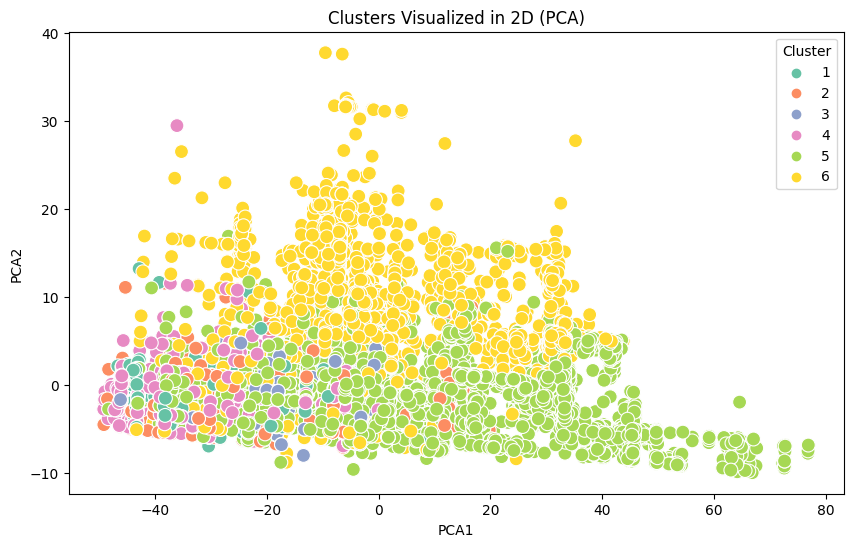

In [71]:
visualize_clusters(clusters_MF, X)

In [72]:
evaluate_cluster(clusters_MF, y)

{1: 0, 4: 1, 3: 2, 0: 3, 2: 4, 6: 5, 5: 6}
0.30580980826669235


{'score': 0.30580980826669235,
 'cluster_to_tar': {1: 0, 4: 1, 3: 2, 0: 3, 2: 4, 6: 5, 5: 6}}

It's not a good idea to use NMF directly classify since the feature similarity are not perfectly align with the target classification.

## MCA and Supervised Model

Multiple Correspondence Analysis (MCA) is a dimensionality reduction technique designed for categorical data, similar to how PCA works for continuous data. We can ulitize MCA to reduce dimension of our data, so our supervised model will learn more efficiently.

### Supervised Model Baseline

Here, we use SVM as our supervised model benmark. Let's see how well SVM performs without MCA.

In [163]:
X = train_df.drop('NObeyesdad', axis=1) 
y = train_df['NObeyesdad']

In [146]:
results = {}

In [161]:
def SVM_train_predict(X, y, numerical_features=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']):
    time0 = time.time()
    
    scaler = StandardScaler()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    print(X_train.shape, y_train.shape)
    print(X_val.shape, y_val.shape)
    
    SVM = SVC(probability=True)
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    time1 = time.time()
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        "Time spend": time1 - time0
    }

In [148]:
results["Baseline"] = SVM_train_predict(X, y)
print(results["Baseline"])

(16606, 30) (16606,)
(4152, 30) (4152,)
{'Accuracy': 0.876204238921002, 'Precision': 0.8768803528147111, 'Recall': 0.876204238921002, 'F1 Score': 0.8764257531803294, 'Time spend': 28.21272039413452}


In [149]:
categorical_df = X[X.columns.difference(numerical_features)]
print(categorical_df.columns)
categorical_df = categorical_df.astype(int)
categorical_df.head()

Index(['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'FAVC_no', 'FAVC_yes',
       'Gender_Female', 'Gender_Male', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'SCC_no', 'SCC_yes', 'SMOKE_no', 'SMOKE_yes',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes'],
      dtype='object')


,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,FAVC_no,FAVC_yes,Gender_Female,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_no,SCC_yes,SMOKE_no,SMOKE_yes,family_history_with_overweight_no,family_history_with_overweight_yes
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
1,0,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,1,0,0,1
2,0,0,1,0,0,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,1
3,0,0,1,0,0,1,0,0,1,1,...,0,0,1,0,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1


In [150]:
numerical_df = X[numerical_features]
print(numerical_df.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [151]:
def reduce_dimension_mca(categorical_df, n_components=2):
    mca = MCA(n_components=n_components, random_state=42)
    mca_result = mca.fit_transform(categorical_df)   
    mca_result = mca_result.set_axis([f'MCA{i+1}'for i in range(n_components)], axis=1)
    return mca_result

In [152]:
mca_result = reduce_dimension_mca(categorical_df)
mca_result.head()

,MCA1,MCA2
0,-0.272569,-0.033202
1,0.261678,0.405436
2,-0.052414,-0.068139
3,-0.142421,-0.377540
4,-0.272569,-0.033202


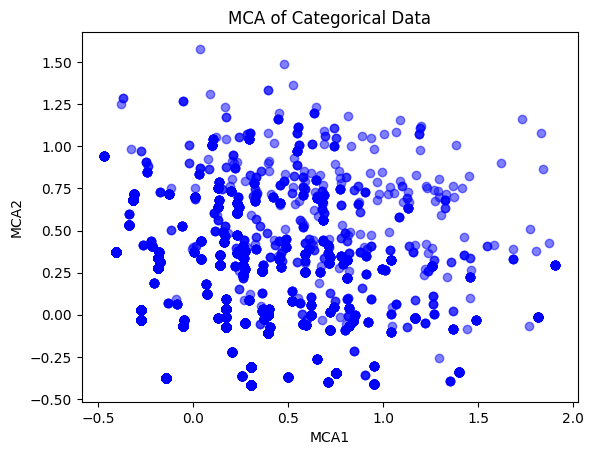

In [121]:
plt.scatter(mca_result['MCA1'], mca_result['MCA2'], c='blue', alpha=0.5)
plt.title('MCA of Categorical Data')
plt.xlabel('MCA1')
plt.ylabel('MCA2')
plt.show()

In [153]:
X_reduced = pd.concat([numerical_df, mca_result], axis=1)
X_reduced.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,MCA1,MCA2
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,-0.272569,-0.033202
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,0.261678,0.405436
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,-0.052414,-0.068139
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,-0.142421,-0.377540
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,-0.272569,-0.033202


In [154]:
results["Reduce Categories to 2"] = SVM_train_predict(X_reduced,y)
print(results["Reduce Categories to 2"])

(16606, 10) (16606,)
(4152, 10) (4152,)
{'Accuracy': 0.8668111753371869, 'Precision': 0.8674145313338384, 'Recall': 0.8668111753371869, 'F1 Score': 0.8670211884496458, 'Time spend': 20.034626245498657}


SVM predicts faster since there are less features, but the accuracy rate is also drop.

### Tune Hyperparameter

In [158]:
n_components_param = [1, 2, 4, 6, 8, 10]
categorical_df = X[X.columns.difference(numerical_features)]
categorical_df = categorical_df.astype(int)
numerical_df = X[numerical_features]
for n in n_components_param: 
    mca_result = reduce_dimension_mca(categorical_df, n_components=n)
    X_reduced = pd.concat([numerical_df, mca_result], axis=1)
    
    results["Reduce Categories to " + str(n)] = SVM_train_predict(X_reduced, y)
    print("N: ", n)
    print('Accuracy: ' + str(results["Reduce Categories to " + str(n)]['Accuracy']))

(16606, 9) (16606,)
(4152, 9) (4152,)
N:  1
Accuracy: 0.8603082851637764
(16606, 10) (16606,)
(4152, 10) (4152,)
N:  2
Accuracy: 0.8668111753371869
(16606, 12) (16606,)
(4152, 12) (4152,)
N:  4
Accuracy: 0.8713872832369942
(16606, 14) (16606,)
(4152, 14) (4152,)
N:  6
Accuracy: 0.8766859344894027
(16606, 16) (16606,)
(4152, 16) (4152,)
N:  8
Accuracy: 0.8788535645472062
(16606, 18) (16606,)
(4152, 18) (4152,)
N:  10
Accuracy: 0.8798169556840078


In [159]:
results_df = pd.DataFrame(results).T;
results_df

,Accuracy,Precision,Recall,F1 Score,Time spend
Baseline,0.876204,0.876880,0.876204,0.876426,28.212720
Reduce Categories to 2,0.866811,0.867415,0.866811,0.867021,19.967936
Reduce Categories to 4,0.871387,0.871442,0.871387,0.871280,21.465107
Reduce Categories to 6,0.876686,0.876912,0.876686,0.876760,22.579669
Reduce Categories to 8,0.878854,0.878970,0.878854,0.878867,21.833853
Reduce Categories to 10,0.879817,0.880007,0.879817,0.879834,22.356460
Reduce Categories to 1,0.860308,0.860866,0.860308,0.860454,19.639864


### Tansform Numerical Features to Categorical

We observed some numerical features are also discrete, like main meals consumption per day. We can convert them to categorical and apply mca as well.

In [166]:
non_real_numerical_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in non_real_numerical_features:
    X[col] = X[col].map(lambda x: round(x))
X = pd.get_dummies(X, columns=non_real_numerical_features)
print(X.shape)
X.head()

(20758, 42)


,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,...,CH2O_1,CH2O_2,CH2O_3,FAF_0,FAF_1,FAF_2,FAF_3,TUE_0,TUE_1,TUE_2
0,24.443011,1.699998,81.669950,False,True,False,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,True,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
2,18.000000,1.711460,50.165754,True,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
3,20.952737,1.710730,131.274851,True,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,31.641081,1.914186,93.798055,False,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [168]:
n_components_param = [1, 2, 4, 6, 8, 10]
real_numerical_features = ['Age', 'Height', 'Weight']
categorical_df = X[X.columns.difference(real_numerical_features)]
categorical_df = categorical_df.astype(int)
numerical_df = X[real_numerical_features]
for n in n_components_param: 
    mca_result = reduce_dimension_mca(categorical_df, n_components=n)
    X_reduced = pd.concat([numerical_df, mca_result], axis=1)
    
    results["Convert Numerical to Categorical and Reduce to " + str(n)] = SVM_train_predict(X_reduced, y, real_numerical_features)
    print("N: ", n)
    print('Accuracy: ' + str(results["Convert Numerical to Categorical and Reduce to " + str(n)]['Accuracy']))

(16606, 4) (16606,)
(4152, 4) (4152,)
N:  1
Accuracy: 0.859344894026975
(16606, 5) (16606,)
(4152, 5) (4152,)
N:  2
Accuracy: 0.8660886319845857
(16606, 7) (16606,)
(4152, 7) (4152,)
N:  4
Accuracy: 0.8728323699421965
(16606, 9) (16606,)
(4152, 9) (4152,)
N:  6
Accuracy: 0.8795761078998073
(16606, 11) (16606,)
(4152, 11) (4152,)
N:  8
Accuracy: 0.8817437379576107
(16606, 13) (16606,)
(4152, 13) (4152,)
N:  10
Accuracy: 0.8793352601156069


# Results and Analysis

In [169]:
results_df = pd.DataFrame(results).T;
results_df

,Accuracy,Precision,Recall,F1 Score,Time spend
Baseline,0.876204,0.876880,0.876204,0.876426,28.212720
Reduce Categories to 2,0.866811,0.867415,0.866811,0.867021,19.967936
Reduce Categories to 4,0.871387,0.871442,0.871387,0.871280,21.465107
Reduce Categories to 6,0.876686,0.876912,0.876686,0.876760,22.579669
Reduce Categories to 8,0.878854,0.878970,0.878854,0.878867,21.833853
Reduce Categories to 10,0.879817,0.880007,0.879817,0.879834,22.356460
Reduce Categories to 1,0.860308,0.860866,0.860308,0.860454,19.639864
Convert Numerical to Categorical and Reduce to 2,0.866089,0.866793,0.866089,0.866322,12.027396
Convert Numerical to Categorical and Reduce to 1,0.859345,0.860265,0.859345,0.859676,12.025472
Convert Numerical to Categorical and Reduce to 4,0.872832,0.873745,0.872832,0.872987,13.113121


**We can see MCA did great job on preserving information. When we reduce 22 categorical features to 1 dimension, we reduced original dataset with shape(20758 * 30) to a small dataset with shape(20758 * 9), we didn't loss too much accuracy from 0.87 to 0.86. Since there are some numerical features are not real numerical features, we can reduce dimension more aggressively. After we convert 5 numerical features and now reduce all categorical features to 2, we reduced original dataset with shape(20758, 42)(original columns increased after we one hot numerical features) to dataset with shape(20758 * 5), this model still give us a good accuracy score: 0.86.**

**By observing this table, we can also see the more components MCA kept , the high accuracy score we got. This makes sense as the more components MCA has means the loss between projection is less.**

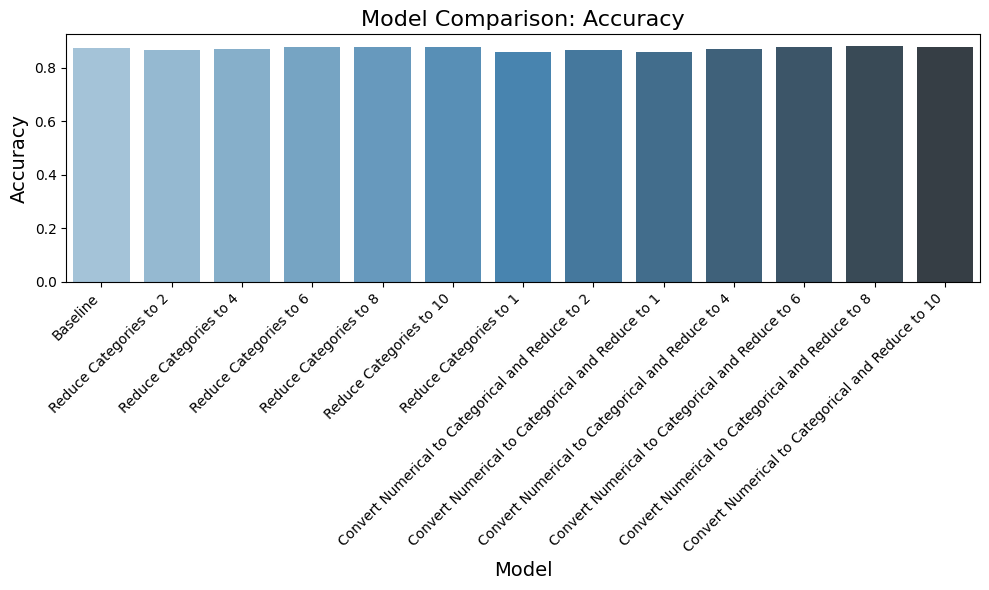

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette="Blues_d")
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

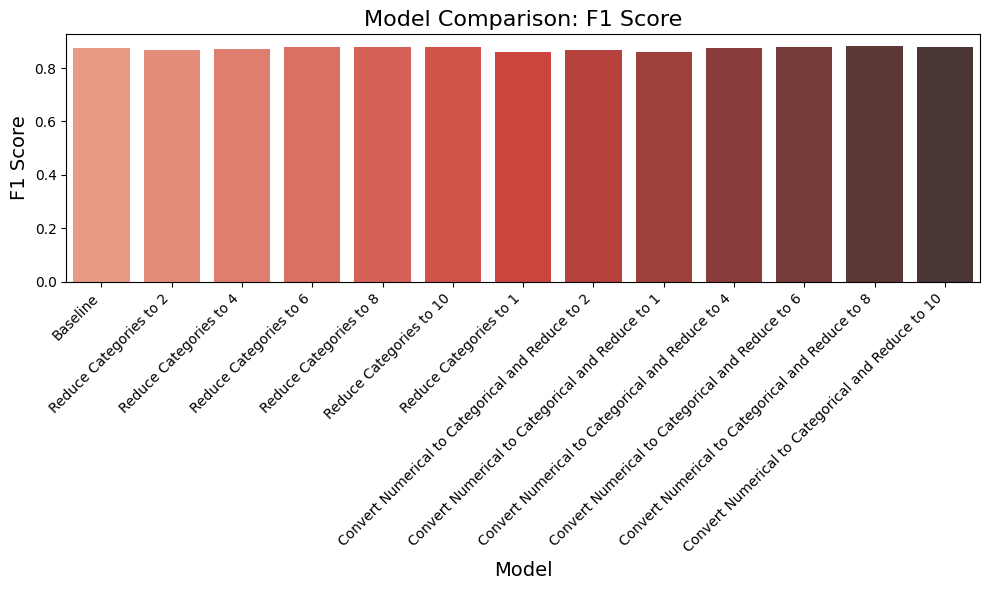

In [173]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='F1 Score', data=results_df, palette="Reds_d")
plt.title('Model Comparison: F1 Score', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**After reduce dimension, we almost didn't lost accuracy and f1 score**

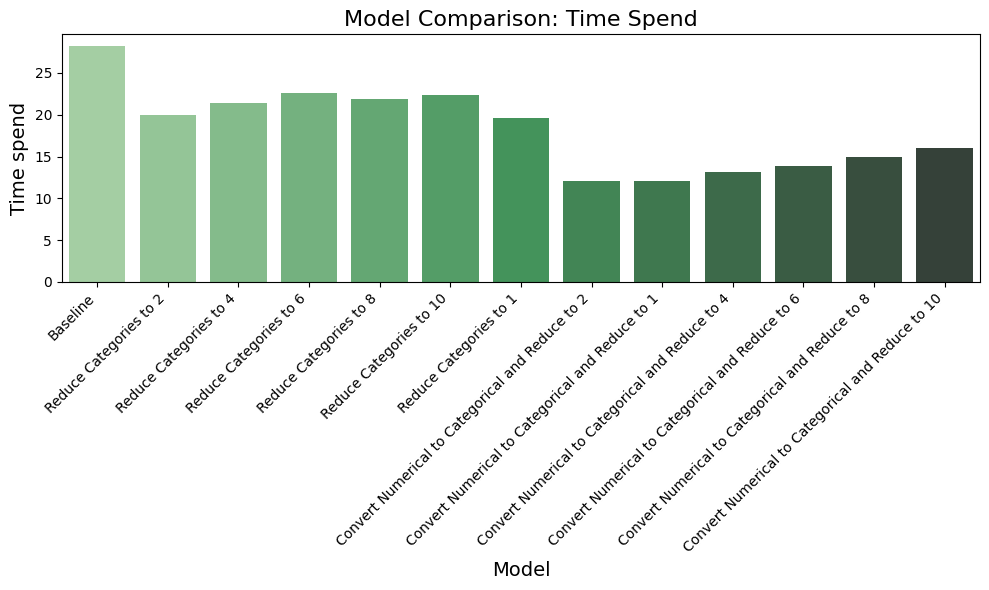

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Time spend', data=results_df, palette="Greens_d")
plt.title('Model Comparison: Time Spend', fontsize=16)
plt.ylabel('Time spend', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Lower dimensionality did save us some time**

# Conclusion

* This notebook explored the dataset, and find out the dataset is highly imbalanced and discrete, and contains many categorical features.
* This notebook tried to use K-Means Clustering to find pattern of the dataset. The result indicates the feature similarity of data points doesn't align with the target multipal classes. The main reason might be the Eclidean distance of categorical feature dimension doesn't make sense.
* This notebook also used NMF to learn latent features and reduce dimensionality. The result shows NMF also struggle with capturing categorical features.
* Finally, this project used MCA to deal with categorical feature, then use SVM as supervised model to predict. The result demonstrates MCA can preserve categorcial relationships very well after reduce dimensionality, leading to SVM learn more efficiently without hurting accuracy score too much.
* Key take away is MCA handle discrete data very well, and MCA can be very useful with combination of supervised model, especially when the dataset is large.
* Future work: This notebook mainly focus on unsupervised learning approach. With more work on choosing supervised models and tune supervised model, the combination of unsupervised method and supervised models might give us a better results.

# Reference

* https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
* https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* https://en.wikipedia.org/wiki/Multiple_correspondence_analysis
* https://www.xlstat.com/en/solutions/features/multiple-correspondence-analysis-mca#:~:text=Multiple%20Correspondence%20Analysis%20(MCA)%20is,Analysis%20is%20to%20quantitative%20variables.
* https://www.kaggle.com/code/patriciabrezeanu/multiple-correspondence-analysis/notebook
* https://www.kaggle.com/code/mdismielhossenabir/multi-class-prediction-of-obesity-risk
* https://www.kaggle.com/code/karamalhanatleh/multi-class-obesity-risk-prediction-using-various